# ETL: Extract, Transform, Load
## Fundamentos para Data Engineering

## Índice
1. Introducción a ETL
- ¿Qué es ETL?
- Importancia en Data Engineering
- ETL vs ELT
- Herramientas comunes para ETL
2. Fase de Extracción (Extract)
- Fuentes de datos
- Métodos de extracción
- Consideraciones importantes
- Ejemplos prácticos
3. Fase de Transformación (Transform)
- Tipos de transformaciones
- Limpieza de datos
- Normalización y estandarización
- Enriquecimiento de datos
- Ejemplos prácticos
4. Fase de Carga (Load)
- Destinos de carga
- Métodos de carga
- Consideraciones de rendimiento
- Ejemplos prácticos
5. Proyecto Práctico Completo
- Implementación de un pipeline ETL
- Análisis de resultados
6. Mejores Prácticas y Consideraciones
- Monitoreo y logging
- Manejo de errores
- Escalabilidad
- Seguridad
7. Ejercicios para Estudiantes

## 1. Introducción a ETL

### ¿Qué es ETL?
ETL (Extract, Transform, Load) es un proceso fundamental en el ámbito de la ingeniería de datos que consiste en:
- Extraer datos de diversas fuentes (bases de datos, APIs, archivos, etc.)
- Transformar los datos para que sean útiles para análisis (limpieza, normalización, enriquecimiento)
- Cargar los datos en un destino final (data warehouse, data lake, base de datos, etc.)
El proceso ETL permite integrar datos de múltiples fuentes heterogéneas en un único repositorio centralizado, facilitando el análisis y la toma de decisiones basada en datos.

### Importancia en Data Engineering
Los procesos ETL son fundamentales en Data Engineering por varias razones:
1. Integración de datos: Permiten combinar datos de múltiples fuentes en un formato coherente.
2. Mejora de la calidad de datos: Durante la fase de transformación, se pueden identificar y corregir problemas de calidad.
3. Estandarización: Convierten datos de diferentes formatos a un formato común para análisis.
4. Historización: Facilitan el almacenamiento de datos históricos para análisis de tendencias.
5. Preparación para análisis: Transforman los datos en formatos optimizados para consultas analíticas.
6. Automatización: Permiten automatizar flujos de datos complejos, reduciendo la intervención manual.

### ETL vs ELT
En los últimos años, ha surgido un enfoque alternativo conocido como ELT (Extract, Load, Transform):
| Característica | ETL | ELT |
|----------------|-----|-----|
| Orden de operaciones | Extracción → Transformación → Carga | Extracción → Carga → Transformación |
| Dónde ocurre la transformación | En un servidor intermedio o herramienta ETL | En el destino final (data warehouse) |
| Ventajas | Mayor control sobre transformaciones, mejor para datos sensibles | Mayor velocidad de carga, aprovecha potencia del data warehouse |
| Casos de uso típicos | Datos que requieren limpieza significativa, entornos con restricciones de seguridad | Big data, data lakes, cuando se necesita flexibilidad |
| Tecnologías asociadas | Informatica, Talend, SSIS | Snowflake, BigQuery, Redshift |

La elección entre ETL y ELT depende de varios factores, incluyendo el volumen de datos, requisitos de procesamiento, infraestructura existente y casos de uso específicos.

### Herramientas comunes para ETL
Existen numerosas herramientas para implementar procesos ETL:
Herramientas de código abierto:
- Apache Airflow
- Apache NiFi
- Talend Open Studio
- Pentaho Data Integration
Herramientas comerciales:
- Informatica PowerCenter
- IBM DataStage
- Microsoft SSIS
- Oracle Data Integrator
Servicios en la nube:
- AWS Glue
- Azure Data Factory
- Google Cloud Dataflow
- Fivetran
- Stitch
Frameworks y bibliotecas de programación:
- Python (Pandas, PySpark)
- Scala (Spark)
- dbt (data build tool)
En este notebook, nos enfocaremos en implementar procesos ETL utilizando Python y sus bibliotecas, especialmente Pandas, que es ampliamente utilizado para manipulación y análisis de datos.

In [2]:
# Importamos las bibliotecas necesarias para nuestro trabajo ETL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sqlite3
from datetime import datetime
import os
import json
from io import StringIO
import re
import warnings

# Configuraciones generales
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
%matplotlib inline

print("Bibliotecas importadas correctamente.")

Bibliotecas importadas correctamente.


## 2. Fase de Extracción (Extract)

### Fuentes de datos
La fase de extracción consiste en obtener datos de diversas fuentes. Estas fuentes pueden ser:
1. Bases de datos relacionales:
- MySQL, PostgreSQL, Oracle, SQL Server, etc.
- Se accede mediante conexiones JDBC/ODBC o bibliotecas específicas
2. Bases de datos NoSQL:
- MongoDB, Cassandra, Redis, etc.
- Cada una tiene sus propios métodos de acceso
3. Archivos planos:
- CSV, TSV, Excel, JSON, XML, etc.
- Fáciles de procesar con bibliotecas estándar
4. APIs y servicios web:
- REST, SOAP, GraphQL
- Requieren autenticación y manejo de respuestas
5. Sistemas de mensajería:
- Kafka, RabbitMQ, etc.
- Útiles para datos en tiempo real
6. Web scraping:
- Extracción de datos de páginas web
- Requiere herramientas como BeautifulSoup, Scrapy
7. Sistemas de archivos distribuidos:
- HDFS, S3, etc.
- Para grandes volúmenes de datos

### Métodos de extracción
Existen diferentes métodos para extraer datos:
1. Extracción completa: Se extraen todos los datos de la fuente cada vez.
2. Extracción incremental: Solo se extraen los datos nuevos o modificados desde la última extracción.
- Basada en marcas de tiempo
- Basada en identificadores secuenciales
- Basada en registros de cambios (CDC - Change Data Capture)
3. Extracción por lotes (batch): Los datos se extraen en lotes programados (diarios, semanales, etc.).
4. Extracción en tiempo real (streaming): Los datos se extraen continuamente a medida que se generan.

### Consideraciones importantes
Al diseñar la fase de extracción, es importante considerar:
- Volumen de datos: ¿Cuántos datos necesitamos extraer? ¿Podemos manejarlos con nuestros recursos?
- Frecuencia de extracción: ¿Con qué frecuencia necesitamos actualizar los datos?
- Impacto en los sistemas fuente: ¿La extracción afectará el rendimiento de los sistemas de origen?
- Seguridad y permisos: ¿Tenemos los permisos necesarios para acceder a los datos?
- Manejo de errores: ¿Qué sucede si la extracción falla? ¿Cómo recuperamos?
- Validación de datos: ¿Cómo verificamos que los datos extraídos son correctos y completos?

### Ejemplos prácticos de extracción

#### Ejemplo 1: Extracción desde CSV

In [3]:
def extract_from_csv(file_path):
    """Extrae datos desde un archivo CSV"""
    print(f"Extrayendo datos desde {file_path}...")
    return pd.read_csv(file_path)

# Creamos un CSV de ejemplo
sample_data = pd.DataFrame({
    'id': range(1, 11),
    'nombre': ['Ana', 'Juan', 'María', 'Pedro', 'Luis', 'Carla', 'Diego', 'Sofía', 'Miguel', 'Laura'],
    'edad': [25, 30, 22, 35, 28, 33, 27, 24, 31, 29],
    'ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Valencia', 'Madrid', 'Barcelona', 'Sevilla', 'Valencia', 'Madrid', 'Barcelona'],
    'salario': [35000, 42000, 30000, 38000, 36000, 45000, 33000, 37000, 40000, 39000]
})

# Guardamos el CSV
sample_data.to_csv('datos_empleados.csv', index=False)

# Extraemos los datos
df_csv = extract_from_csv('datos_empleados.csv')
print("Muestra de datos extraídos desde CSV:")
df_csv.head()

Extrayendo datos desde datos_empleados.csv...
Muestra de datos extraídos desde CSV:


,id,nombre,edad,ciudad,salario
0,1,Ana,25,Madrid,35000
1,2,Juan,30,Barcelona,42000
2,3,María,22,Sevilla,30000
3,4,Pedro,35,Valencia,38000
4,5,Luis,28,Madrid,36000


#### Ejemplo 2: Extracción desde API

In [4]:
def extract_from_api(url):
    """Extrae datos desde una API"""
    print(f"Extrayendo datos desde API: {url}...")
    response = requests.get(url)
    if response.status_code == 200:
        return pd.DataFrame(response.json())
    else:
        print(f"Error al extraer datos: {response.status_code}")
        return None

# Usamos una API pública para el ejemplo
api_url = "https://jsonplaceholder.typicode.com/users"
df_api = extract_from_api(api_url)
print("\nMuestra de datos extraídos desde API:")
df_api[['id', 'name', 'email', 'username']].head()

Extrayendo datos desde API: https://jsonplaceholder.typicode.com/users...

Muestra de datos extraídos desde API:


,id,name,email,username
0,1,Leanne Graham,Sincere@april.biz,Bret
1,2,Ervin Howell,Shanna@melissa.tv,Antonette
2,3,Clementine Bauch,Nathan@yesenia.net,Samantha
3,4,Patricia Lebsack,Julianne.OConner@kory.org,Karianne
4,5,Chelsey Dietrich,Lucio_Hettinger@annie.ca,Kamren


#### Ejemplo 3: Extracción desde base de datos

In [5]:
def extract_from_database(query, connection):
    """Extrae datos desde una base de datos"""
    print(f"Extrayendo datos con query: {query}...")
    return pd.read_sql(query, connection)

# Creamos una base de datos SQLite de ejemplo
conn = sqlite3.connect('ejemplo_db.sqlite')
sample_data.to_sql('empleados', conn, if_exists='replace', index=False)

# Extraemos datos
query = "SELECT * FROM empleados WHERE salario > 35000"
df_db = extract_from_database(query, conn)
print("\nMuestra de datos extraídos desde base de datos:")
df_db.head()

Extrayendo datos con query: SELECT * FROM empleados WHERE salario > 35000...

Muestra de datos extraídos desde base de datos:


,id,nombre,edad,ciudad,salario
0,2,Juan,30,Barcelona,42000
1,4,Pedro,35,Valencia,38000
2,5,Luis,28,Madrid,36000
3,6,Carla,33,Barcelona,45000
4,8,Sofía,24,Valencia,37000


#### Ejemplo 4: Extracción desde JSON

In [6]:
def extract_from_json(file_path):
    """Extrae datos desde un archivo JSON"""
    print(f"Extrayendo datos desde JSON: {file_path}...")
    with open(file_path, 'r') as file:
        data = json.load(file)
    return pd.DataFrame(data)

# Creamos un archivo JSON de ejemplo
productos = [
    {"id": 1, "nombre": "Laptop", "precio": 1200, "categoria": "Electrónica", "stock": 15},
    {"id": 2, "nombre": "Smartphone", "precio": 800, "categoria": "Electrónica", "stock": 25},
    {"id": 3, "nombre": "Auriculares", "precio": 100, "categoria": "Accesorios", "stock": 50},
    {"id": 4, "nombre": "Monitor", "precio": 300, "categoria": "Electrónica", "stock": 10},
    {"id": 5, "nombre": "Teclado", "precio": 80, "categoria": "Accesorios", "stock": 30}
]

with open('productos.json', 'w') as f:
    json.dump(productos, f)

# Extraemos datos del JSON
df_json = extract_from_json('productos.json')
print("\nMuestra de datos extraídos desde JSON:")
df_json.head()

Extrayendo datos desde JSON: productos.json...

Muestra de datos extraídos desde JSON:


,id,nombre,precio,categoria,stock
0,1,Laptop,1200,Electrónica,15
1,2,Smartphone,800,Electrónica,25
2,3,Auriculares,100,Accesorios,50
3,4,Monitor,300,Electrónica,10
4,5,Teclado,80,Accesorios,30


#### Ejemplo 5: Extracción desde Excel

In [7]:
def extract_from_excel(file_path, sheet_name=0):
    """Extrae datos desde un archivo Excel"""
    print(f"Extrayendo datos desde Excel: {file_path}, hoja: {sheet_name}...")
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Creamos un archivo Excel de ejemplo
clientes = pd.DataFrame({
    'id': range(1, 6),
    'nombre': ['Empresa A', 'Empresa B', 'Empresa C', 'Empresa D', 'Empresa E'],
    'contacto': ['Juan Pérez', 'María López', 'Carlos Ruiz', 'Ana Martínez', 'Pedro Sánchez'],
    'email': ['info@empresaa.com', 'contacto@empresab.com', 'ventas@empresac.com',
             'soporte@empresad.com', 'admin@empresae.com'],
    'pais': ['España', 'México', 'Argentina', 'Colombia', 'Chile']
})

# Guardamos en Excel
clientes.to_excel('clientes.xlsx', index=False)

# Extraemos datos del Excel
df_excel = extract_from_excel('clientes.xlsx')
print("\nMuestra de datos extraídos desde Excel:")
df_excel.head()

ModuleNotFoundError: No module named 'openpyxl'

#### Ejemplo 6: Extracción desde una URL (CSV remoto)

In [8]:
def extract_from_url_csv(url):
    """Extrae datos CSV desde una URL"""
    print(f"Extrayendo datos CSV desde URL: {url}...")
    return pd.read_csv(url)

# Usamos un dataset público de Iris
iris_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df_iris = extract_from_url_csv(iris_url)
print("\nMuestra de datos Iris extraídos desde URL:")
df_iris.head()

Extrayendo datos CSV desde URL: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv...

Muestra de datos Iris extraídos desde URL:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Fase de Transformación (Transform)

### Tipos de transformaciones
La fase de transformación es donde los datos extraídos se convierten, limpian y estructuran para su análisis. Las transformaciones más comunes incluyen:
1. Limpieza de datos:
- Manejo de valores nulos
- Eliminación de duplicados
- Corrección de errores
- Validación de datos
2. Transformaciones estructurales:
- Cambio de tipos de datos
- Normalización de esquemas
- Pivoteo de datos
- Desnormalización
3. Transformaciones de valores:
- Normalización y estandarización
- Codificación de variables categóricas
- Discretización de variables continuas
- Escalado de valores
4. Enriquecimiento de datos:
- Agregación de datos
- Cálculo de métricas derivadas
- Combinación con datos externos
- Generación de características (feature engineering)
5. Transformaciones temporales:
- Conversión de zonas horarias
- Cálculo de duraciones
- Agregaciones por períodos (diario, mensual, etc.)
- Detección de patrones temporales

### Limpieza de datos
La limpieza de datos es fundamental para garantizar la calidad de los análisis posteriores. Algunas técnicas comunes incluyen:

#### Manejo de valores nulos

In [9]:
# Continuamos con los datos de empleados
print("Datos originales:")
df_csv.head()

# Simulamos algunos valores nulos
df_limpieza = df_csv.copy()
df_limpieza.loc[2, 'salario'] = None
df_limpieza.loc[5, 'edad'] = None
df_limpieza.loc[8, 'ciudad'] = None

print("\nDatos con valores nulos simulados:")
print(df_limpieza.isnull().sum())

# Estrategias para manejar valores nulos
# 1. Eliminar filas con valores nulos
df_drop_na = df_limpieza.dropna()
print("\nDespués de eliminar filas con valores nulos:")
print(f"Filas originales: {len(df_limpieza)}, Filas después de dropna: {len(df_drop_na)}")

# 2. Rellenar con valores específicos
df_fill = df_limpieza.copy()
df_fill['salario'] = df_fill['salario'].fillna(df_fill['salario'].mean())
df_fill['edad'] = df_fill['edad'].fillna(df_fill['edad'].median())
df_fill['ciudad'] = df_fill['ciudad'].fillna('Desconocida')

print("\nDespués de rellenar valores nulos:")
print(df_fill.isnull().sum())
print("\nValores después de rellenar:")
print(df_fill.loc[[2, 5, 8]])

Datos originales:

Datos con valores nulos simulados:
id         0
nombre     0
edad       1
ciudad     1
salario    1
dtype: int64

Después de eliminar filas con valores nulos:
Filas originales: 10, Filas después de dropna: 7

Después de rellenar valores nulos:
id         0
nombre     0
edad       0
ciudad     0
salario    0
dtype: int64

Valores después de rellenar:
   id  nombre  edad       ciudad       salario
2   3   María  22.0      Sevilla  38333.333333
5   6   Carla  28.0    Barcelona  45000.000000
8   9  Miguel  31.0  Desconocida  40000.000000


#### Eliminación de duplicados

In [10]:
# Creamos datos con duplicados
df_con_duplicados = pd.concat([df_csv, df_csv.iloc[0:3]], ignore_index=True)

print(f"Datos con duplicados (filas: {len(df_con_duplicados)}):")
print(df_con_duplicados)

# Identificar duplicados
duplicados = df_con_duplicados.duplicated()
print(f"\nFilas duplicadas: {duplicados.sum()}")

# Eliminar duplicados
df_sin_duplicados = df_con_duplicados.drop_duplicates()
print(f"\nDatos sin duplicados (filas: {len(df_sin_duplicados)}):")
print(df_sin_duplicados.head())

# También podemos eliminar duplicados basados en ciertas columnas
df_sin_duplicados_ciudad = df_con_duplicados.drop_duplicates(subset=['ciudad'])
print(f"\nDatos sin duplicados por ciudad (filas: {len(df_sin_duplicados_ciudad)}):")
print(df_sin_duplicados_ciudad)

Datos con duplicados (filas: 13):
    id  nombre  edad     ciudad  salario
0    1     Ana    25     Madrid    35000
1    2    Juan    30  Barcelona    42000
2    3   María    22    Sevilla    30000
3    4   Pedro    35   Valencia    38000
4    5    Luis    28     Madrid    36000
5    6   Carla    33  Barcelona    45000
6    7   Diego    27    Sevilla    33000
7    8   Sofía    24   Valencia    37000
8    9  Miguel    31     Madrid    40000
9   10   Laura    29  Barcelona    39000
10   1     Ana    25     Madrid    35000
11   2    Juan    30  Barcelona    42000
12   3   María    22    Sevilla    30000

Filas duplicadas: 3

Datos sin duplicados (filas: 10):
   id nombre  edad     ciudad  salario
0   1    Ana    25     Madrid    35000
1   2   Juan    30  Barcelona    42000
2   3  María    22    Sevilla    30000
3   4  Pedro    35   Valencia    38000
4   5   Luis    28     Madrid    36000

Datos sin duplicados por ciudad (filas: 4):
   id nombre  edad     ciudad  salario
0   1    Ana    25

#### Corrección de errores y validación de datos

In [18]:
# Creamos datos con errores
df_con_errores = df_csv.copy()
df_con_errores.loc[0, 'edad'] = -5  # Edad negativa (imposible)
df_con_errores.loc[1, 'salario'] = -1000  # Salario negativo (imposible)
df_con_errores.loc[2, 'ciudad'] = 'MaDRid'  # Inconsistencia en mayúsculas/minúsculas
df_con_errores.loc[3, 'nombre'] = 'P3dr0'  # Caracteres no válidos en nombre

print("Datos con errores:")
print(df_con_errores.iloc[0:4])

# Corregimos los errores
df_corregido = df_con_errores.copy()

# 1. Corregir edades negativas
df_corregido['edad'] = df_corregido['edad'].apply(lambda x: max(0, x))

# 2. Corregir salarios negativos
df_corregido['salario'] = df_corregido['salario'].apply(lambda x: max(0, x))

# 3. Normalizar ciudades (todo a mayúsculas)
df_corregido['ciudad'] = df_corregido['ciudad'].str.upper()

# 4. Limpiar nombres (solo letras y espacios)
df_corregido['nombre'] = df_corregido['nombre'].apply(
    lambda x: re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', x) if isinstance(x, str) else x
)

print("\nDatos corregidos:")
print(df_corregido.iloc[0:4])

Datos con errores:
   id nombre  edad     ciudad  salario
0   1    Ana    -5     Madrid    35000
1   2   Juan    30  Barcelona    -1000
2   3  María    22     MaDRid    30000
3   4  P3dr0    35   Valencia    38000

Datos corregidos:
   id nombre  edad     ciudad  salario
0   1    Ana     0     MADRID    35000
1   2   Juan    30  BARCELONA        0
2   3  María    22     MADRID    30000
3   4    Pdr    35   VALENCIA    38000


### Normalización y estandarización

Datos originales de Iris:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Datos normalizados con Min-Max Scaling:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       0.428704     0.440556      0.467458     0.458056
std        0.230018     0.181611      0.299203     0.317599
min        0.000000     0.000000      0.000000     0.000000
25%        0.222222     0.333333      0.101695     0.083333
50%        0.416667     0.416667 

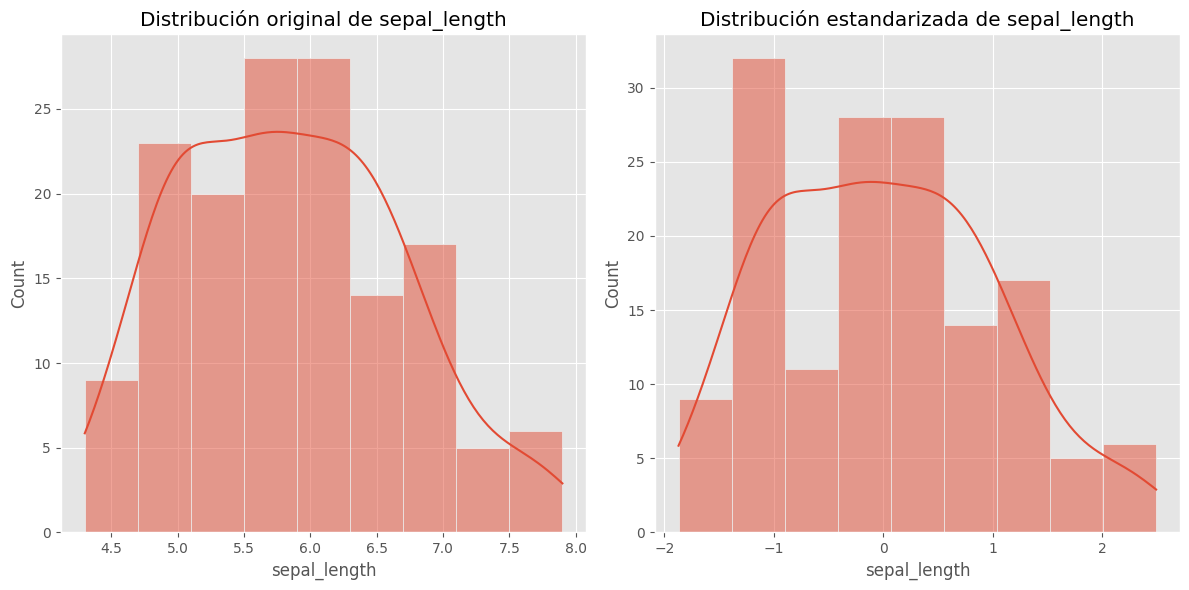

In [19]:
# Usamos el dataset de Iris para ejemplos de normalización
print("Datos originales de Iris:")
print(df_iris.describe())

# Visualizamos la distribución original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_iris['sepal_length'], kde=True)
plt.title('Distribución original de sepal_length')

# 1. Min-Max Scaling (normalización)
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_iris_minmax = df_iris.copy()
df_iris_minmax[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler_minmax.fit_transform(
    df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

print("\nDatos normalizados con Min-Max Scaling:")
print(df_iris_minmax.describe())

# 2. Standardization (estandarización)
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_iris_standard = df_iris.copy()
df_iris_standard[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler_standard.fit_transform(
    df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

print("\nDatos estandarizados:")
print(df_iris_standard.describe())

# Visualizamos la distribución estandarizada
plt.subplot(1, 2, 2)
sns.histplot(df_iris_standard['sepal_length'], kde=True)
plt.title('Distribución estandarizada de sepal_length')
plt.tight_layout()
plt.show()

### Enriquecimiento de datos

In [20]:
# Continuamos con los datos de empleados
df_enriquecido = df_csv.copy()

# 1. Creación de nuevas columnas derivadas
# Categoría de salario
df_enriquecido['categoria_salario'] = pd.cut(
    df_enriquecido['salario'],
    bins=[0, 30000, 40000, 100000],
    labels=['Bajo', 'Medio', 'Alto']
)

# Antigüedad simulada (años en la empresa)
np.random.seed(42)
df_enriquecido['antiguedad'] = np.random.randint(1, 10, size=len(df_enriquecido))

# Bono anual (5% del salario por año de antigüedad)
df_enriquecido['bono_anual'] = df_enriquecido['salario'] * 0.05 * df_enriquecido['antiguedad']
df_enriquecido['bono_anual'] = df_enriquecido['bono_anual'].round(2)

# 2. Agregación de datos externos
# Simulamos datos de departamentos
departamentos = pd.DataFrame({
    'ciudad': ['MADRID', 'BARCELONA', 'SEVILLA', 'VALENCIA'],
    'departamento_principal': ['Finanzas', 'Marketing', 'Operaciones', 'Tecnología'],
    'costo_vida': [85, 90, 75, 80]  # Índice de costo de vida (ficticio)
})

# Unimos con los datos de empleados
df_enriquecido['ciudad'] = df_enriquecido['ciudad'].str.upper()
df_enriquecido = df_enriquecido.merge(departamentos, on='ciudad', how='left')

# 3. Cálculo de salario ajustado por costo de vida
df_enriquecido['salario_ajustado'] = df_enriquecido['salario'] / (df_enriquecido['costo_vida'] / 100)
df_enriquecido['salario_ajustado'] = df_enriquecido['salario_ajustado'].round(2)

print("Datos enriquecidos:")
df_enriquecido.head()

Datos enriquecidos:


,id,nombre,edad,ciudad,salario,categoria_salario,antiguedad,bono_anual,departamento_principal,costo_vida,salario_ajustado
0,1,Ana,25,MADRID,35000,Medio,7,12250.0,Finanzas,85,41176.47
1,2,Juan,30,BARCELONA,42000,Alto,4,8400.0,Marketing,90,46666.67
2,3,María,22,SEVILLA,30000,Bajo,8,12000.0,Operaciones,75,40000.00
3,4,Pedro,35,VALENCIA,38000,Medio,5,9500.0,Tecnología,80,47500.00
4,5,Luis,28,MADRID,36000,Medio,7,12600.0,Finanzas,85,42352.94


### Transformaciones de tiempo

Datos de ventas con fechas:

Datos con componentes de fecha extraídos:

Ventas agregadas por mes:
    año  mes     monto  cantidad  num_transacciones
0  2023    1  19084.53       368                 31
1  2023    2  13730.92       279                 28
2  2023    3  15100.48       307                 31
3  2023    4   5334.50        90                 10


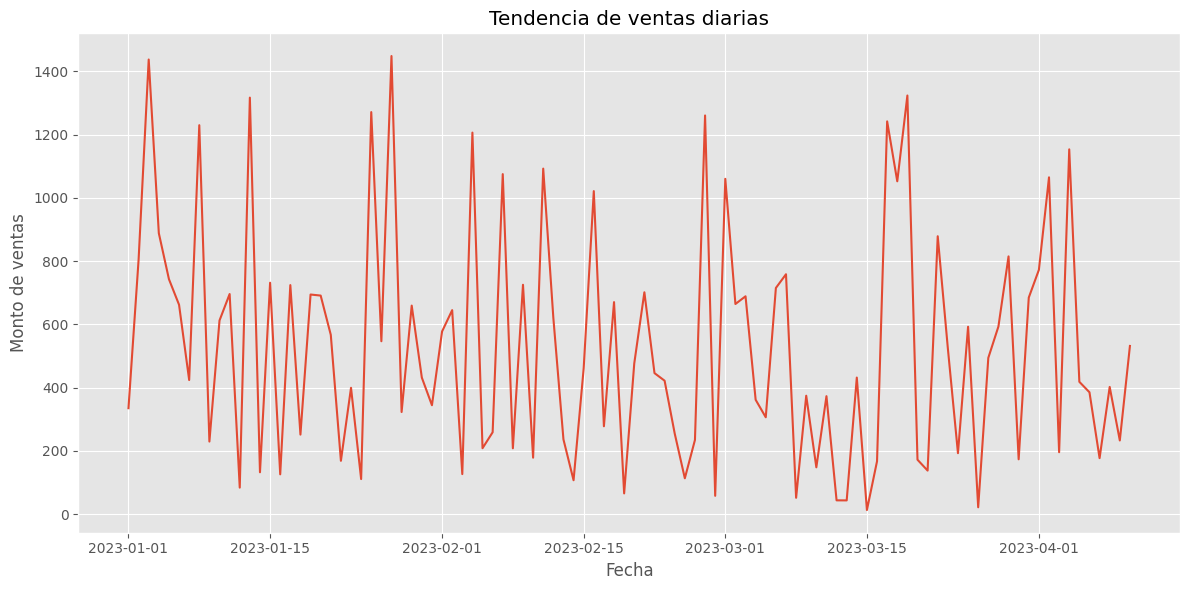

In [12]:
# Creamos datos con fechas
fechas_ventas = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=100),
    'producto_id': np.random.randint(1, 6, size=100),
    'cantidad': np.random.randint(1, 20, size=100),
    'precio_unitario': np.random.uniform(10, 100, size=100).round(2)
})

fechas_ventas['monto'] = fechas_ventas['cantidad'] * fechas_ventas['precio_unitario']

print("Datos de ventas con fechas:")
fechas_ventas.head()

# 1. Extracción de componentes de fecha
fechas_ventas['año'] = fechas_ventas['fecha'].dt.year
fechas_ventas['mes'] = fechas_ventas['fecha'].dt.month
fechas_ventas['dia'] = fechas_ventas['fecha'].dt.day
fechas_ventas['dia_semana'] = fechas_ventas['fecha'].dt.day_name()
fechas_ventas['trimestre'] = fechas_ventas['fecha'].dt.quarter

print("\nDatos con componentes de fecha extraídos:")
fechas_ventas.head()

# 2. Agregación por período
ventas_mensuales = fechas_ventas.groupby(['año', 'mes']).agg({
    'monto': 'sum',
    'cantidad': 'sum',
    'fecha': 'count'
}).rename(columns={'fecha': 'num_transacciones'}).reset_index()

print("\nVentas agregadas por mes:")
print(ventas_mensuales)

# 3. Visualización de tendencias temporales
plt.figure(figsize=(12, 6))
ventas_diarias = fechas_ventas.groupby('fecha')['monto'].sum().reset_index()
plt.plot(ventas_diarias['fecha'], ventas_diarias['monto'])
plt.title('Tendencia de ventas diarias')
plt.xlabel('Fecha')
plt.ylabel('Monto de ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

### Transformaciones estructurales

In [13]:
# Ejemplo de pivoteo de datos
# Usamos los datos de ventas por fecha
# Pivoteo: Convertir de formato largo a ancho
ventas_pivot = fechas_ventas.pivot_table(
    index='fecha',
    columns='producto_id',
    values='monto',
    aggfunc='sum'
).fillna(0)

print("Datos pivoteados (ventas por producto y fecha):")
print(ventas_pivot.head())

# Melt: Convertir de formato ancho a largo
ventas_melt = ventas_pivot.reset_index().melt(
    id_vars=['fecha'],
    value_vars=ventas_pivot.columns,
    var_name='producto_id',
    value_name='monto'
)

print("\nDatos convertidos de ancho a largo:")
print(ventas_melt.head())

Datos pivoteados (ventas por producto y fecha):
producto_id       1       2       3       4       5
fecha                                              
2023-01-01     0.00    0.00  335.04    0.00     0.0
2023-01-02   804.27    0.00    0.00    0.00     0.0
2023-01-03     0.00    0.00    0.00    0.00  1437.3
2023-01-04     0.00    0.00    0.00  888.24     0.0
2023-01-05     0.00  742.98    0.00    0.00     0.0

Datos convertidos de ancho a largo:
       fecha producto_id   monto
0 2023-01-01           1    0.00
1 2023-01-02           1  804.27
2 2023-01-03           1    0.00
3 2023-01-04           1    0.00
4 2023-01-05           1    0.00


In [14]:
# Ejemplo de agrupación y agregación
ventas_por_producto = fechas_ventas.groupby('producto_id').agg({
    'monto': ['sum', 'mean', 'min', 'max', 'count'],
    'cantidad': ['sum', 'mean']
})

print("Datos agregados por producto:")
print(ventas_por_producto)

# Aplanamos los nombres de columnas para facilitar su uso
ventas_por_producto.columns = ['_'.join(col).strip() for col in ventas_por_producto.columns.values]
ventas_por_producto = ventas_por_producto.reset_index()

print("\nDatos agregados con columnas aplanadas:")
print(ventas_por_producto)

Datos agregados por producto:
                monto                                    cantidad           
                  sum        mean     min      max count      sum       mean
producto_id                                                                 
1             7694.83  480.926875   13.14  1206.27    16      161  10.062500
2            10048.54  558.252222   21.79  1260.45    18      205  11.388889
3            13251.42  552.142500  107.34  1241.76    24      250  10.416667
4            11982.04  599.102000   65.66  1448.32    20      224  11.200000
5            10273.60  466.981818   43.58  1437.30    22      204   9.272727

Datos agregados con columnas aplanadas:
   producto_id  monto_sum  monto_mean  monto_min  monto_max  monto_count  \
0            1    7694.83  480.926875      13.14    1206.27           16   
1            2   10048.54  558.252222      21.79    1260.45           18   
2            3   13251.42  552.142500     107.34    1241.76           24   
3        

### Codificación de variables categóricas

In [15]:
# Usamos el dataset de Iris para ejemplos de codificación
print("Datos originales de Iris (primeras filas):")
print(df_iris.head())

# 1. One-Hot Encoding
df_iris_onehot = pd.get_dummies(df_iris, columns=['species'], prefix='species')
print("\nDatos con One-Hot Encoding:")
print(df_iris_onehot.head())

# 2. Label Encoding
from sklearn.preprocessing import LabelEncoder

df_iris_label = df_iris.copy()
label_encoder = LabelEncoder()
df_iris_label['species_encoded'] = label_encoder.fit_transform(df_iris_label['species'])

print("\nDatos con Label Encoding:")
print(df_iris_label.head())
print("\nMapeo de etiquetas:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

Datos originales de Iris (primeras filas):
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Datos con One-Hot Encoding:
   sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
0           5.1          3.5           1.4          0.2            True   
1           4.9          3.0           1.4          0.2            True   
2           4.7          3.2           1.3          0.2            True   
3           4.6          3.1           1.5          0.2            True   
4           5.0          3.6           1.4          0.2            True   

   species_versicolor  species_virginica  
0               False              False  
1      

## 4. Fase de Carga (Load)

### Destinos de carga
La fase de carga es donde los datos transformados se almacenan en un destino final. Los destinos comunes incluyen:
1. Bases de datos relacionales:
- PostgreSQL
- MySQL, Oracle, SQL Server, etc.
- Optimizadas para transacciones y consultas estructuradas
2. Data Warehouses:
- Snowflake, Amazon Redshift, Google BigQuery, etc.
- Optimizados para consultas analíticas y grandes volúmenes
3. Data Lakes:
- Amazon S3, Azure Data Lake, Google Cloud Storage, etc.
- Almacenamiento de datos en bruto y procesados
4. Sistemas NoSQL:
- MongoDB, Cassandra, etc.
- Para datos no estructurados o semi-estructurados
5. Archivos:
- CSV, Parquet, Avro, ORC, etc.
- Para intercambio de datos o análisis local

### Métodos de carga
Existen diferentes métodos para cargar datos:
1. Carga completa (Full Load):
- Se reemplaza todo el conjunto de datos en el destino
- Simple pero ineficiente para grandes volúmenes
2. Carga incremental:
- Solo se cargan los datos nuevos o modificados
- Más eficiente pero requiere seguimiento de cambios
3. Carga por lotes (Batch Load):
- Los datos se cargan en lotes programados
- Equilibrio entre rendimiento y actualidad
4. Carga en tiempo real (Streaming Load):
- Los datos se cargan continuamente
- Para casos que requieren datos muy actualizados

### Consideraciones de rendimiento
Al diseñar la fase de carga, es importante considerar:
- Volumen de datos: ¿Cuántos datos necesitamos cargar? ¿El destino puede manejarlos?
- Frecuencia de carga: ¿Con qué frecuencia necesitamos actualizar los datos en el destino?
- Ventanas de mantenimiento: ¿Hay períodos específicos para realizar cargas masivas?
- Integridad de datos: ¿Cómo garantizamos que los datos se carguen correctamente?
- Transaccionalidad: ¿Necesitamos garantizar que todas las cargas sean atómicas?
- Paralelismo: ¿Podemos cargar datos en paralelo para mejorar el rendimiento?

### Ejemplos prácticos de carga

#### Ejemplo 1: Carga en base de datos SQLite

In [21]:
def load_to_database(df, table_name, connection, if_exists='replace'):
    """Carga datos a una base de datos"""
    print(f"Cargando datos a la tabla {table_name}...")
    df.to_sql(table_name, connection, if_exists=if_exists, index=False)
    print(f"Datos cargados exitosamente a {table_name}")
    
    # Verificamos la carga
    count_query = f"SELECT COUNT(*) FROM {table_name}"
    count = pd.read_sql(count_query, connection).iloc[0, 0]
    print(f"Registros cargados: {count}")

# Usamos los datos enriquecidos de empleados
conn_destino = sqlite3.connect('datawarehouse.db')
load_to_database(df_enriquecido, 'empleados_dim', conn_destino, 'replace')

# Verificamos con una consulta
query_result = pd.read_sql("SELECT * FROM empleados_dim LIMIT 5", conn_destino)
print("\nVerificación de datos cargados en la base de datos:")
print(query_result)

Cargando datos a la tabla empleados_dim...
Datos cargados exitosamente a empleados_dim
Registros cargados: 10

Verificación de datos cargados en la base de datos:
   id nombre  edad     ciudad  salario categoria_salario  antiguedad  \
0   1    Ana    25     MADRID    35000             Medio           7   
1   2   Juan    30  BARCELONA    42000              Alto           4   
2   3  María    22    SEVILLA    30000              Bajo           8   
3   4  Pedro    35   VALENCIA    38000             Medio           5   
4   5   Luis    28     MADRID    36000             Medio           7   

   bono_anual departamento_principal  costo_vida  salario_ajustado  
0     12250.0               Finanzas          85          41176.47  
1      8400.0              Marketing          90          46666.67  
2     12000.0            Operaciones          75          40000.00  
3      9500.0             Tecnología          80          47500.00  
4     12600.0               Finanzas          85          4

#### Ejemplo 2: Carga incremental en base de datos

In [22]:
# Simulamos datos nuevos para carga incremental
nuevos_empleados = pd.DataFrame({
    'id': range(11, 16),
    'nombre': ['Roberto', 'Elena', 'Javier', 'Carmen', 'Francisco'],
    'edad': [26, 34, 29, 31, 40],
    'ciudad': ['MADRID', 'VALENCIA', 'BARCELONA', 'SEVILLA', 'MADRID'],
    'salario': [36000, 39000, 41000, 34000, 44000]
})

# Enriquecemos los nuevos datos (similar a los anteriores)
nuevos_empleados['categoria_salario'] = pd.cut(
    nuevos_empleados['salario'],
    bins=[0, 30000, 40000, 100000],
    labels=['Bajo', 'Medio', 'Alto']
)

nuevos_empleados['antiguedad'] = np.random.randint(1, 5, size=len(nuevos_empleados))
nuevos_empleados['bono_anual'] = nuevos_empleados['salario'] * 0.05 * nuevos_empleados['antiguedad']
nuevos_empleados['bono_anual'] = nuevos_empleados['bono_anual'].round(2)

# Unimos con datos de departamentos
nuevos_empleados = nuevos_empleados.merge(departamentos, on='ciudad', how='left')
nuevos_empleados['salario_ajustado'] = nuevos_empleados['salario'] / (nuevos_empleados['costo_vida'] / 100)
nuevos_empleados['salario_ajustado'] = nuevos_empleados['salario_ajustado'].round(2)

# Carga incremental (append)
load_to_database(nuevos_empleados, 'empleados_dim', conn_destino, 'append')

# Verificamos la carga incremental
total_empleados = pd.read_sql("SELECT COUNT(*) as total FROM empleados_dim", conn_destino)
print(f"\nTotal de empleados después de carga incremental: {total_empleados.iloc[0, 0]}")

# Verificamos los nuevos registros
nuevos_registros = pd.read_sql("SELECT * FROM empleados_dim WHERE id > 10", conn_destino)
print("\nNuevos registros cargados:")
print(nuevos_registros)

Cargando datos a la tabla empleados_dim...
Datos cargados exitosamente a empleados_dim
Registros cargados: 15

Total de empleados después de carga incremental: 15

Nuevos registros cargados:
   id     nombre  edad     ciudad  salario categoria_salario  antiguedad  \
0  11    Roberto    26     MADRID    36000             Medio           4   
1  12      Elena    34   VALENCIA    39000             Medio           4   
2  13     Javier    29  BARCELONA    41000              Alto           3   
3  14     Carmen    31    SEVILLA    34000             Medio           2   
4  15  Francisco    40     MADRID    44000              Alto           1   

   bono_anual departamento_principal  costo_vida  salario_ajustado  
0      7200.0               Finanzas          85          42352.94  
1      7800.0             Tecnología          80          48750.00  
2      6150.0              Marketing          90          45555.56  
3      3400.0            Operaciones          75          45333.33  
4      

#### Ejemplo 3: Carga en archivos CSV y Excel

In [23]:
def load_to_csv(df, file_path):
    """Carga datos a un archivo CSV"""
    print(f"Guardando datos en {file_path}...")
    df.to_csv(file_path, index=False)
    print(f"Datos guardados exitosamente en {file_path}")
    
    # Verificamos el archivo
    file_size = os.path.getsize(file_path)
    print(f"Tamaño del archivo: {file_size} bytes")

def load_to_excel(df, file_path):
    """Carga datos a un archivo Excel"""
    print(f"Guardando datos en {file_path}...")
    df.to_excel(file_path, index=False)
    print(f"Datos guardados exitosamente en {file_path}")
    
    # Verificamos el archivo
    file_size = os.path.getsize(file_path)
    print(f"Tamaño del archivo: {file_size} bytes")

# Cargamos los datos de ventas agregados
load_to_csv(ventas_por_producto, 'ventas_por_producto.csv')
load_to_excel(ventas_mensuales, 'ventas_mensuales.xlsx')

Guardando datos en ventas_por_producto.csv...
Datos guardados exitosamente en ventas_por_producto.csv
Tamaño del archivo: 398 bytes
Guardando datos en ventas_mensuales.xlsx...


ModuleNotFoundError: No module named 'openpyxl'

#### Ejemplo 4: Carga en formato Parquet

In [24]:
try:
    import pyarrow.parquet as pq
    import pyarrow as pa
    
    def load_to_parquet(df, file_path):
        """Carga datos a un archivo Parquet"""
        print(f"Guardando datos en formato Parquet: {file_path}...")
        df.to_parquet(file_path, index=False)
        print(f"Datos guardados exitosamente en {file_path}")
        
        # Verificamos el archivo
        file_size = os.path.getsize(file_path)
        print(f"Tamaño del archivo: {file_size} bytes")
    
    # Cargamos los datos de Iris en formato Parquet
    load_to_parquet(df_iris, 'iris_dataset.parquet')
    
    # Leemos el archivo Parquet para verificar
    df_parquet = pd.read_parquet('iris_dataset.parquet')
    print("\nDatos leídos desde Parquet (primeras filas):")
    print(df_parquet.head())
    
except ImportError:
    print("Para usar Parquet, instala: pip install pyarrow")
    print("Continuando sin la demostración de Parquet...")

Guardando datos en formato Parquet: iris_dataset.parquet...
Datos guardados exitosamente en iris_dataset.parquet
Tamaño del archivo: 4470 bytes

Datos leídos desde Parquet (primeras filas):
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#### Ejemplo 5: Carga en formato JSON

In [25]:
def load_to_json(df, file_path, orient='records'):
    """Carga datos a un archivo JSON"""
    print(f"Guardando datos en formato JSON: {file_path}...")
    df.to_json(file_path, orient=orient)
    print(f"Datos guardados exitosamente en {file_path}")
    
    # Verificamos el archivo
    file_size = os.path.getsize(file_path)
    print(f"Tamaño del archivo: {file_size} bytes")

# Cargamos los datos de empleados en formato JSON
load_to_json(df_enriquecido, 'empleados_enriquecidos.json')

# Leemos el archivo JSON para verificar
with open('empleados_enriquecidos.json', 'r') as f:
    json_data = json.load(f)

print(f"\nDatos leídos desde JSON (número de registros: {len(json_data)}):")
print(json_data[0])  # Mostramos el primer registro

Guardando datos en formato JSON: empleados_enriquecidos.json...
Datos guardados exitosamente en empleados_enriquecidos.json
Tamaño del archivo: 2175 bytes

Datos leídos desde JSON (número de registros: 10):
{'id': 1, 'nombre': 'Ana', 'edad': 25, 'ciudad': 'MADRID', 'salario': 35000, 'categoria_salario': 'Medio', 'antiguedad': 7, 'bono_anual': 12250.0, 'departamento_principal': 'Finanzas', 'costo_vida': 85, 'salario_ajustado': 41176.47}


## 5. Proyecto Práctico Completo

### Implementación de un pipeline ETL completo
Ahora implementaremos un proceso ETL completo con un caso más realista:
1. Extraer datos de ventas de múltiples fuentes
2. Transformar y limpiar los datos
3. Cargar los datos en una base de datos para análisis
Este ejemplo simula un escenario donde tenemos datos de ventas de diferentes regiones.

In [26]:
# Creamos datos simulados para el ejemplo
def create_sample_data():
    """Crea archivos de muestra para el proyecto ETL"""
    
    # Datos de ventas región Norte
    norte_data = pd.DataFrame({
        'fecha': pd.date_range(start='2023-01-01', periods=100),
        'producto_id': np.random.randint(1, 21, size=100),
        'cantidad': np.random.randint(1, 50, size=100),
        'precio_unitario': np.random.uniform(10, 100, size=100).round(2),
        'cliente_id': np.random.randint(1, 51, size=100),
        'region': 'Norte'
    })
    norte_data.to_csv('ventas_norte.csv', index=False)
    
    # Datos de ventas región Sur
    sur_data = pd.DataFrame({
        'fecha': pd.date_range(start='2023-01-01', periods=120),
        'producto_id': np.random.randint(1, 21, size=120),
        'cantidad': np.random.randint(1, 50, size=120),
        'precio_unitario': np.random.uniform(10, 100, size=120).round(2),
        'cliente_id': np.random.randint(1, 51, size=120),
        'region': 'Sur'
    })
    sur_data.to_csv('ventas_sur.csv', index=False)
    
    # Datos de ventas región Este (en formato JSON)
    este_data = pd.DataFrame({
        'fecha': pd.date_range(start='2023-01-01', periods=80),
        'producto_id': np.random.randint(1, 21, size=80),
        'cantidad': np.random.randint(1, 50, size=80),
        'precio_unitario': np.random.uniform(10, 100, size=80).round(2),
        'cliente_id': np.random.randint(1, 51, size=80),
        'region': 'Este'
    })
    # Convertimos fechas a string para JSON
    este_data['fecha'] = este_data['fecha'].dt.strftime('%Y-%m-%d')
    este_data.to_json('ventas_este.json', orient='records')
    
    # Datos de productos (en formato JSON)
    productos = pd.DataFrame({
        'producto_id': range(1, 21),
        'nombre': [f'Producto {i}' for i in range(1, 21)],
        'categoria': np.random.choice(['Electrónica', 'Ropa', 'Hogar', 'Alimentos', 'Juguetes'], size=20),
        'proveedor_id': np.random.randint(1, 6, size=20)
    })
    productos.to_json('productos.json', orient='records')
    
    # Datos de clientes (en base de datos)
    clientes = pd.DataFrame({
        'cliente_id': range(1, 51),
        'nombre': [f'Cliente {i}' for i in range(1, 51)],
        'email': [f'cliente{i}@ejemplo.com' for i in range(1, 51)],
        'tipo': np.random.choice(['Regular', 'Premium', 'VIP'], size=50),
        'fecha_registro': pd.date_range(start='2022-01-01', periods=50)
    })
    
    # Creamos una base de datos para clientes
    conn_ventas = sqlite3.connect('ventas.db')
    clientes.to_sql('clientes', conn_ventas, if_exists='replace', index=False)
    conn_ventas.close()
    
    print("Datos de muestra creados exitosamente.")
    return norte_data, sur_data, este_data, productos, clientes

# Creamos los datos de muestra
norte_data, sur_data, este_data, productos, clientes = create_sample_data()

Datos de muestra creados exitosamente.


### Implementación del proceso ETL completo

In [27]:
def etl_ventas():
    """Proceso ETL completo para datos de ventas"""
    
    print("Iniciando proceso ETL para datos de ventas...")
    print(f"Hora de inicio: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    # 1. EXTRACCIÓN
    print("\n--- FASE DE EXTRACCIÓN ---")
    
    # Extraer datos de ventas de CSV
    print("Extrayendo datos de ventas región Norte...")
    ventas_norte = pd.read_csv('ventas_norte.csv')
    print(f"Registros extraídos: {len(ventas_norte)}")
    
    print("\nExtrayendo datos de ventas región Sur...")
    ventas_sur = pd.read_csv('ventas_sur.csv')
    print(f"Registros extraídos: {len(ventas_sur)}")
    
    # Extraer datos de ventas de JSON
    print("\nExtrayendo datos de ventas región Este...")
    with open('ventas_este.json', 'r') as f:
        ventas_este_json = json.load(f)
    ventas_este = pd.DataFrame(ventas_este_json)
    print(f"Registros extraídos: {len(ventas_este)}")
    
    # Extraer datos de productos de JSON
    print("\nExtrayendo datos de productos...")
    with open('productos.json', 'r') as f:
        productos_json = json.load(f)
    productos = pd.DataFrame(productos_json)
    print(f"Productos extraídos: {len(productos)}")
    
    # Extraer datos de clientes de la base de datos
    print("\nExtrayendo datos de clientes desde la base de datos...")
    conn_ventas = sqlite3.connect('ventas.db')
    clientes = pd.read_sql("SELECT * FROM clientes", conn_ventas)
    print(f"Clientes extraídos: {len(clientes)}")
    
    # 2. TRANSFORMACIÓN
    print("\n--- FASE DE TRANSFORMACIÓN ---")
    
    # Combinar datos de ventas
    print("Combinando datos de ventas...")
    ventas = pd.concat([ventas_norte, ventas_sur, ventas_este], ignore_index=True)
    print(f"Total de registros de ventas: {len(ventas)}")
    
    # Convertir fechas
    print("\nConvirtiendo fechas...")
    ventas['fecha'] = pd.to_datetime(ventas['fecha'])
    print(f"Rango de fechas: {ventas['fecha'].min()} a {ventas['fecha'].max()}")
    
    # Calcular monto total
    print("\nCalculando monto total...")
    ventas['monto_total'] = ventas['cantidad'] * ventas['precio_unitario']
    ventas['monto_total'] = ventas['monto_total'].round(2)
    
    # Añadir información de mes y año para análisis
    print("\nAgregando columnas de tiempo...")
    ventas['mes'] = ventas['fecha'].dt.month
    ventas['año'] = ventas['fecha'].dt.year
    ventas['trimestre'] = ventas['fecha'].dt.quarter
    
    # Unir con información de productos
    print("\nUniendo con información de productos...")
    ventas_con_productos = ventas.merge(
        productos[['producto_id', 'nombre', 'categoria']],
        on='producto_id',
        how='left'
    )
    
    # Unir con información de clientes
    print("\nUniendo con información de clientes...")
    ventas_completas = ventas_con_productos.merge(
        clientes[['cliente_id', 'nombre', 'tipo']],
        on='cliente_id',
        how='left',
        suffixes=('_producto', '_cliente')
    )
    
    # Verificar valores nulos
    print("\nVerificando valores nulos...")
    nulos = ventas_completas.isnull().sum()
    if nulos.sum() > 0:
        print("Se encontraron valores nulos:")
        print(nulos[nulos > 0])
        
        # Rellenar valores nulos
        print("Rellenando valores nulos...")
        ventas_completas['nombre_producto'].fillna('Desconocido', inplace=True)
        ventas_completas['categoria'].fillna('Sin categoría', inplace=True)
        ventas_completas['nombre_cliente'].fillna('Cliente no registrado', inplace=True)
        ventas_completas['tipo'].fillna('Regular', inplace=True)
    else:
        print("No se encontraron valores nulos.")
    
    # Crear tabla de hechos y dimensiones para modelo estrella
    print("\nCreando modelo dimensional...")
    
    # Dimensión tiempo
    dim_tiempo = ventas_completas[['fecha', 'mes', 'año', 'trimestre']].drop_duplicates().reset_index(drop=True)
    dim_tiempo['tiempo_id'] = dim_tiempo.index + 1
    
    # Dimensión producto
    dim_producto = ventas_completas[['producto_id', 'nombre_producto', 'categoria']].drop_duplicates().reset_index(drop=True)
    
    # Dimensión cliente
    dim_cliente = ventas_completas[['cliente_id', 'nombre_cliente', 'tipo']].drop_duplicates().reset_index(drop=True)
    
    # Dimensión región
    dim_region = ventas_completas[['region']].drop_duplicates().reset_index(drop=True)
    dim_region['region_id'] = dim_region.index + 1
    
    # Tabla de hechos
    hechos_ventas = ventas_completas.merge(dim_tiempo[['fecha', 'tiempo_id']], on='fecha')
    hechos_ventas = hechos_ventas.merge(dim_region[['region', 'region_id']], on='region')
    
    hechos_ventas = hechos_ventas[[
        'tiempo_id', 'producto_id', 'cliente_id', 'region_id',
        'cantidad', 'precio_unitario', 'monto_total'
    ]]
    
    # 3. CARGA
    print("\n--- FASE DE CARGA ---")
    
    # Crear conexión a la base de datos
    print("Conectando a la base de datos...")
    conn_dw = sqlite3.connect('ventas_datawarehouse.db')
    
    # Cargar dimensiones
    print("\nCargando dimensiones...")
    dim_tiempo.to_sql('dim_tiempo', conn_dw, if_exists='replace', index=False)
    dim_producto.to_sql('dim_producto', conn_dw, if_exists='replace', index=False)
    dim_cliente.to_sql('dim_cliente', conn_dw, if_exists='replace', index=False)
    dim_region.to_sql('dim_region', conn_dw, if_exists='replace', index=False)
    
    # Cargar tabla de hechos
    print("Cargando tabla de hechos...")
    hechos_ventas.to_sql('hechos_ventas', conn_dw, if_exists='replace', index=False)
    
    # Verificar carga
    print("\nVerificando carga de datos...")
    tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn_dw)
    print("Tablas creadas:")
    print(tablas)
    
    for tabla in tablas['name']:
        count = pd.read_sql(f"SELECT COUNT(*) as count FROM {tabla}", conn_dw).iloc[0, 0]
        print(f"Tabla {tabla}: {count} registros")
    
    # Crear vista para análisis
    print("\nCreando vista para análisis...")
    vista_query = """
    CREATE VIEW IF NOT EXISTS ventas_analisis AS
    SELECT 
        t.año, 
        t.mes, 
        t.trimestre,
        p.nombre_producto,
        p.categoria,
        c.nombre_cliente,
        c.tipo,
        r.region,
        SUM(h.cantidad) as total_unidades,
        SUM(h.monto_total) as total_ventas
    FROM hechos_ventas h
    JOIN dim_tiempo t ON h.tiempo_id = t.tiempo_id
    JOIN dim_producto p ON h.producto_id = p.producto_id
    JOIN dim_cliente c ON h.cliente_id = c.cliente_id
    JOIN dim_region r ON h.region_id = r.region_id
    GROUP BY t.año, t.mes, t.trimestre, p.nombre_producto, p.categoria, c.nombre_cliente, c.tipo, r.region
    """
    
    conn_dw.execute(vista_query)
    conn_dw.commit()
    
    # Ejemplo de consulta
    print("\nEjemplo de consulta a la vista de análisis:")
    query_result = pd.read_sql("SELECT * FROM ventas_analisis LIMIT 10", conn_dw)
    print(query_result)
    
    # Cerrar conexiones
    conn_ventas.close()
    conn_dw.close()
    
    print("\nProceso ETL completado exitosamente.")
    print(f"Hora de finalización: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    return {
        'dim_tiempo': dim_tiempo,
        'dim_producto': dim_producto,
        'dim_cliente': dim_cliente,
        'dim_region': dim_region,
        'hechos_ventas': hechos_ventas
    }

# Ejecutamos el proceso ETL
resultado_etl = etl_ventas()

Iniciando proceso ETL para datos de ventas...
Hora de inicio: 2025-03-31 19:54:25

--- FASE DE EXTRACCIÓN ---
Extrayendo datos de ventas región Norte...
Registros extraídos: 100

Extrayendo datos de ventas región Sur...
Registros extraídos: 120

Extrayendo datos de ventas región Este...
Registros extraídos: 80

Extrayendo datos de productos...
Productos extraídos: 20

Extrayendo datos de clientes desde la base de datos...
Clientes extraídos: 50

--- FASE DE TRANSFORMACIÓN ---
Combinando datos de ventas...
Total de registros de ventas: 300

Convirtiendo fechas...
Rango de fechas: 2023-01-01 00:00:00 a 2023-04-30 00:00:00

Calculando monto total...

Agregando columnas de tiempo...

Uniendo con información de productos...

Uniendo con información de clientes...

Verificando valores nulos...
No se encontraron valores nulos.

Creando modelo dimensional...

--- FASE DE CARGA ---
Conectando a la base de datos...

Cargando dimensiones...
Cargando tabla de hechos...

Verificando carga de datos.

### Análisis de resultados


Ventas por categoría de producto:
     categoria  ventas_totales
0         Ropa       118952.22
1     Juguetes       118741.58
2  Electrónica        78545.86
3        Hogar        58262.02
4    Alimentos        47094.04


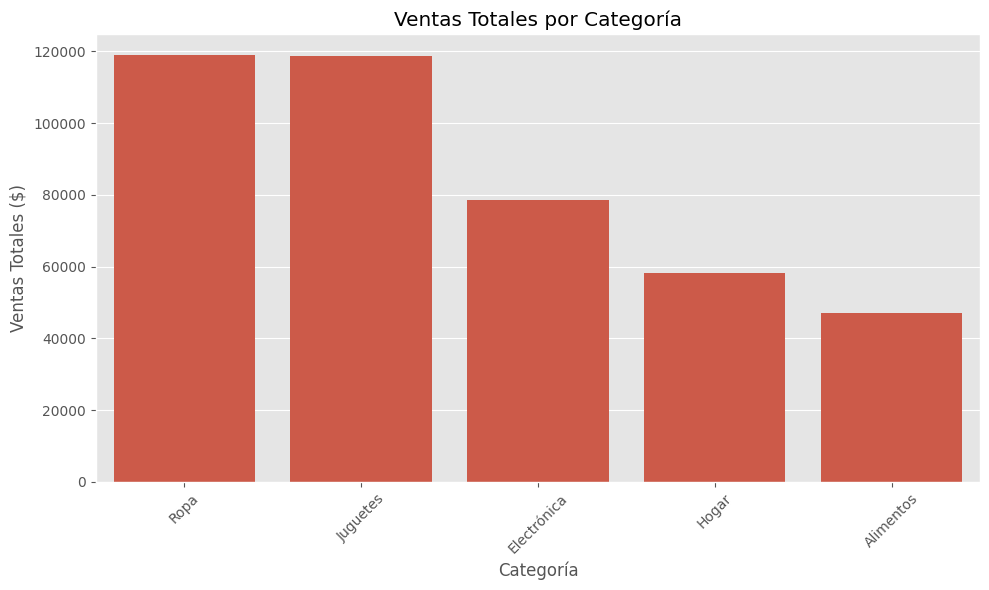


Ventas por región y trimestre:
  region  trimestre  ventas_totales
0   Este          1       103619.88
1  Norte          1       145651.23
2  Norte          2         9758.57
3    Sur          1       123671.87
4    Sur          2        38894.17


<Figure size 1200x600 with 0 Axes>

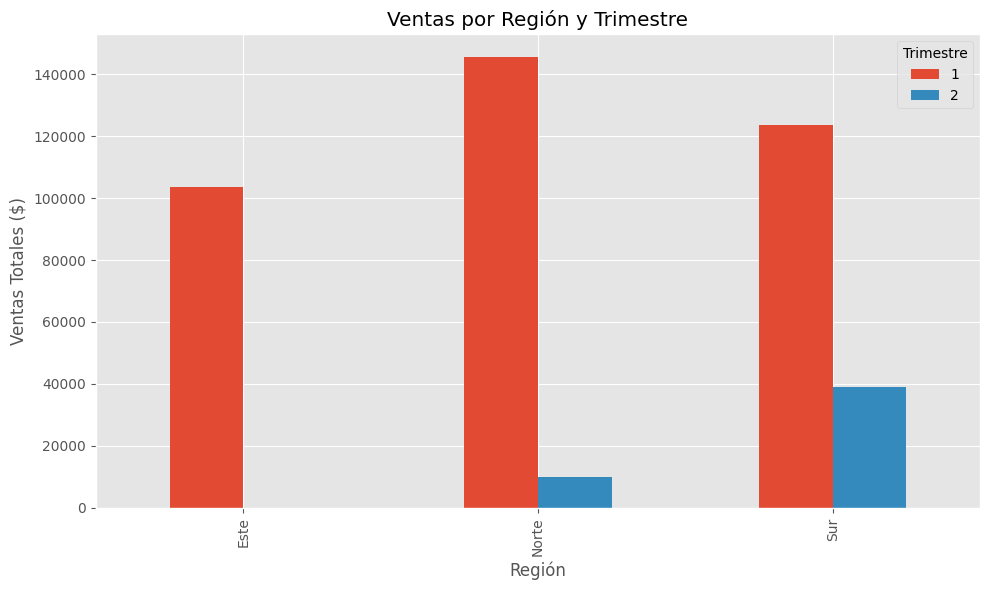


Ventas por tipo de cliente:
      tipo  ventas_totales  num_clientes
0  Regular       189294.87            21
1      VIP       123993.79            15
2  Premium       108307.06            14


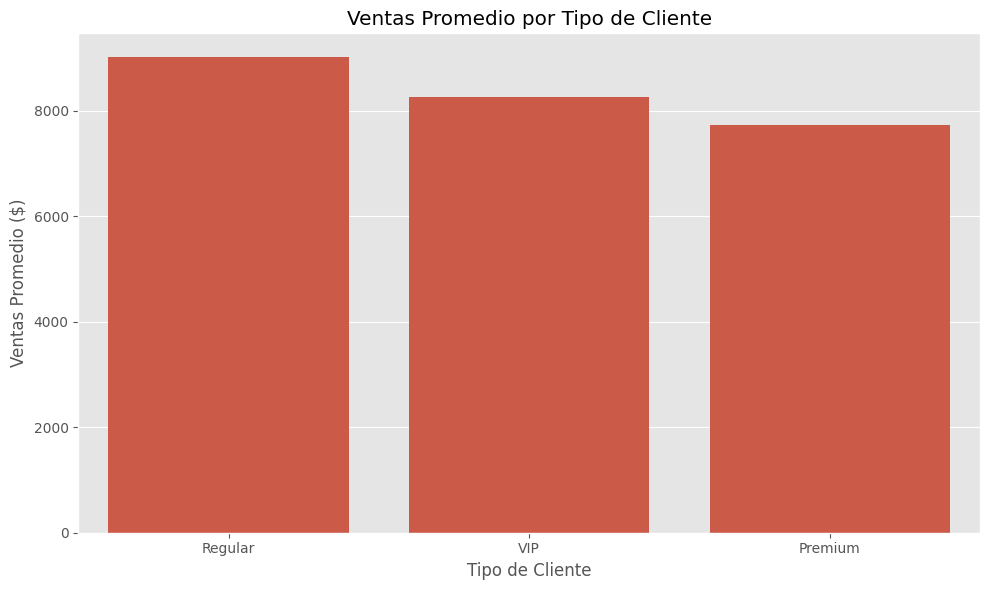

In [28]:
# Conectamos a la base de datos
conn_dw = sqlite3.connect('ventas_datawarehouse.db')

# Ventas por categoría
print("\nVentas por categoría de producto:")
ventas_categoria = pd.read_sql("""
SELECT categoria, SUM(total_ventas) as ventas_totales
FROM ventas_analisis
GROUP BY categoria
ORDER BY ventas_totales DESC
""", conn_dw)

print(ventas_categoria)

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_categoria, x='categoria', y='ventas_totales')
plt.title('Ventas Totales por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ventas por región y trimestre
print("\nVentas por región y trimestre:")
ventas_region_trimestre = pd.read_sql("""
SELECT region, trimestre, SUM(total_ventas) as ventas_totales
FROM ventas_analisis
GROUP BY region, trimestre
ORDER BY region, trimestre
""", conn_dw)

print(ventas_region_trimestre)

plt.figure(figsize=(12, 6))
ventas_pivot = ventas_region_trimestre.pivot(index='region', columns='trimestre', values='ventas_totales')
ventas_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Región y Trimestre')
plt.xlabel('Región')
plt.ylabel('Ventas Totales ($)')
plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

# Ventas por tipo de cliente
print("\nVentas por tipo de cliente:")
ventas_tipo_cliente = pd.read_sql("""
SELECT tipo, SUM(total_ventas) as ventas_totales, COUNT(DISTINCT nombre_cliente) as num_clientes
FROM ventas_analisis
GROUP BY tipo
ORDER BY ventas_totales DESC
""", conn_dw)

print(ventas_tipo_cliente)

# Añadimos columna de ventas promedio por cliente
ventas_tipo_cliente['ventas_promedio_por_cliente'] = (ventas_tipo_cliente['ventas_totales'] / ventas_tipo_cliente['num_clientes']).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_tipo_cliente, x='tipo', y='ventas_promedio_por_cliente')
plt.title('Ventas Promedio por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ventas Promedio ($)')
plt.tight_layout()
plt.show()

# Cerramos la conexión
conn_dw.close()

## 6. Mejores Prácticas y Consideraciones

### Monitoreo y logging
El monitoreo y logging son fundamentales para mantener procesos ETL robustos:
1. Logging detallado:
- Registrar inicio y fin de cada fase
- Capturar errores y excepciones
- Registrar métricas de rendimiento
2. Alertas:
- Configurar alertas para fallos
- Notificar sobre problemas de calidad de datos
- Alertar sobre tiempos de ejecución anormales
3. Dashboards de monitoreo:
- Visualizar métricas clave
- Seguir tendencias de rendimiento
- Identificar cuellos de botella 

In [29]:
# Ejemplo simple de logging en un proceso ETL
import logging

# Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('etl_process.log'),
        logging.StreamHandler()
    ]
)

logger = logging.getLogger('ETL_Ventas')

def etl_con_logging():
    """Ejemplo de ETL con logging"""
    
    try:
        # Inicio del proceso
        logger.info("Iniciando proceso ETL")
        
        # Fase de extracción
        logger.info("Iniciando fase de extracción")
        try:
            # Simulamos extracción
            logger.info("Extrayendo datos de ventas_norte.csv")
            df_norte = pd.read_csv('ventas_norte.csv')
            logger.info(f"Extraídos {len(df_norte)} registros de ventas_norte.csv")
        except Exception as e:
            logger.error(f"Error en extracción de ventas_norte.csv: {str(e)}")
            raise
        
        # Fase de transformación
        logger.info("Iniciando fase de transformación")
        try:
            # Simulamos transformación
            logger.info("Calculando montos totales")
            df_norte['monto_total'] = df_norte['cantidad'] * df_norte['precio_unitario']
            
            # Verificamos calidad de datos
            nulos = df_norte.isnull().sum().sum()
            if nulos > 0:
                logger.warning(f"Se encontraron {nulos} valores nulos en los datos")
            
            logger.info("Transformación completada")
        except Exception as e:
            logger.error(f"Error en transformación: {str(e)}")
            raise
        
        # Fase de carga
        logger.info("Iniciando fase de carga")
        try:
            # Simulamos carga
            logger.info("Cargando datos en base de datos")
            # Aquí iría el código de carga
            logger.info("Carga completada exitosamente")
        except Exception as e:
            logger.error(f"Error en carga: {str(e)}")
            raise
        
        # Fin del proceso
        logger.info("Proceso ETL completado exitosamente")
        
    except Exception as e:
        logger.critical(f"El proceso ETL falló: {str(e)}")
        return False
    
    return True

# Ejecutamos el proceso con logging
etl_con_logging()

2025-03-31 19:58:42,461 - ETL_Ventas - INFO - Iniciando proceso ETL
2025-03-31 19:58:42,462 - ETL_Ventas - INFO - Iniciando fase de extracción
2025-03-31 19:58:42,463 - ETL_Ventas - INFO - Extrayendo datos de ventas_norte.csv
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Extraídos 100 registros de ventas_norte.csv
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Iniciando fase de transformación
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Calculando montos totales
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Transformación completada
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Iniciando fase de carga
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Cargando datos en base de datos
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Carga completada exitosamente
2025-03-31 19:58:42,467 - ETL_Ventas - INFO - Proceso ETL completado exitosamente


True

### Manejo de errores
Un buen manejo de errores es crucial para procesos ETL robustos:
1. Estrategias de manejo de errores:
- Reintentos para errores transitorios
- Manejo de excepciones específicas
- Rollback de transacciones en caso de error
2. Validación de datos:
- Verificar integridad antes de cargar
- Validar contra reglas de negocio
- Registrar y reportar anomalías
3. Recuperación:
- Puntos de control (checkpoints)
- Capacidad de reanudar desde el último punto exitoso
- Procedimientos de recuperación documentados

In [30]:
def extract_with_retry(file_path, max_retries=3, retry_delay=2):
    """Extrae datos con reintentos en caso de error"""
    import time

    for attempt in range(1, max_retries + 1):
        try:
            logger.info(f"Intento {attempt} de extracción desde {file_path}")

            # Simulamos una posible falla aleatoria
            if attempt == 1 and np.random.random() < 0.5:
                raise IOError("Error simulado de lectura de archivo")

            # Extracción real
            data = pd.read_csv(file_path)
            logger.info(f"Extracción exitosa desde {file_path}")
            return data

        except Exception as e:
            logger.warning(f"Error en intento {attempt}: {str(e)}")

            if attempt < max_retries:
                logger.info(f"Reintentando en {retry_delay} segundos...")
                time.sleep(retry_delay)
            else:
                logger.error(f"Fallaron todos los intentos de extracción desde {file_path}")
                raise

# Ejemplo de uso
try:
    data = extract_with_retry('ventas_norte.csv')
    print("Extracción completada con éxito")
except Exception as e:
    print(f"Error final: {str(e)}")

2025-03-31 20:00:36,427 - ETL_Ventas - INFO - Intento 1 de extracción desde ventas_norte.csv
2025-03-31 20:00:36,427 - ETL_Ventas - WARNING - Error en intento 1: Error simulado de lectura de archivo
2025-03-31 20:00:36,427 - ETL_Ventas - INFO - Reintentando en 2 segundos...
2025-03-31 20:00:38,439 - ETL_Ventas - INFO - Intento 2 de extracción desde ventas_norte.csv
2025-03-31 20:00:38,445 - ETL_Ventas - INFO - Extracción exitosa desde ventas_norte.csv


Extracción completada con éxito


### Escalabilidad
Diseñar procesos ETL escalables es esencial para manejar volúmenes crecientes de datos:
1. Procesamiento paralelo:
- Dividir datos en particiones
- Procesar particiones en paralelo
- Utilizar múltiples hilos o procesos
2. Procesamiento distribuido:
- Frameworks como Apache Spark o Dask
- Distribución de carga entre múltiples nodos
- Escalado horizontal
3. Optimización de recursos:
- Procesamiento por lotes
- Gestión eficiente de memoria
- Compresión de datos

In [34]:
# Ejemplo simple de procesamiento paralelo con Pandas
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import time

def procesar_particion(df_partition):
    """Procesa una partición de datos"""
    # Simulamos algún procesamiento
    df_result = df_partition.copy()
    df_result['monto_total'] = df_result['cantidad'] * df_result['precio_unitario']
    df_result['descuento'] = df_result['monto_total'] * 0.1
    df_result['monto_final'] = df_result['monto_total'] - df_result['descuento']

    # Simulamos un procesamiento intensivo
    import time
    time.sleep(0.5)

    return df_result

def procesar_en_paralelo(df, n_partitions=None):
    """Procesa un DataFrame en paralelo"""
    if n_partitions is None:
        n_partitions = multiprocessing.cpu_count()

    # Dividimos el DataFrame en particiones
    df_split = np.array_split(df, n_partitions)

    # Procesamos en paralelo
    print(f"Procesando {len(df)} registros en {n_partitions} particiones...")

    start_time = datetime.now()

    with ProcessPoolExecutor(max_workers=n_partitions) as executor:
        time.sleep(0.5)
        results = list(executor.map(procesar_particion, df_split))

    # Combinamos los resultados
    df_result = pd.concat(results)

    end_time = datetime.now()
    duration = (end_time - start_time).total_seconds()

    print(f"Procesamiento completado en {duration:.2f} segundos")

    return df_result

# Cargamos datos para el ejemplo
df_ventas = pd.read_csv('ventas_norte.csv')

# Procesamiento secuencial para comparación
print("Procesamiento secuencial:")
start_time = datetime.now()
df_result_seq = procesar_particion(df_ventas)
end_time = datetime.now()
duration_seq = (end_time - start_time).total_seconds()
print(f"Tiempo secuencial: {duration_seq:.2f} segundos")

# Procesamiento paralelo
print("\nProcesamiento paralelo:")
df_result_par = procesar_en_paralelo(df_ventas)

# Verificamos que los resultados sean iguales
print("\nVerificación de resultados:")
print(f"Filas en resultado secuencial: {len(df_result_seq)}")
print(f"Filas en resultado paralelo: {len(df_result_par)}")

Procesamiento secuencial:
Tiempo secuencial: 0.51 segundos

Procesamiento paralelo:
Procesando 100 registros en 8 particiones...


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

### Seguridad
La seguridad es un aspecto crítico en los procesos ETL, especialmente cuando se manejan datos sensibles:
1. Protección de datos:
- Cifrado de datos en tránsito y en reposo
- Enmascaramiento de datos sensibles
- Gestión segura de credenciales
2. Control de acceso:
- Principio de mínimo privilegio
- Autenticación y autorización
- Auditoría de accesos
3. Cumplimiento normativo:
- GDPR, HIPAA, PCI-DSS, etc.
- Retención y eliminación de datos
- Documentación de lineamientos de seguridad

In [32]:
# Ejemplo de manejo seguro de credenciales
import os
from dotenv import load_dotenv
import base64

# Simulamos un archivo .env (en producción, este archivo no se incluiría en el control de versiones)
with open('.env', 'w') as f:
    f.write("DB_USER=admin\n")
    f.write("DB_PASSWORD=secretpassword123\n")
    f.write("DB_HOST=database.example.com\n")
    f.write("DB_PORT=5432\n")
    f.write("DB_NAME=datawarehouse\n")

# Cargamos variables de entorno
load_dotenv()

def get_db_connection_string():
    """Obtiene la cadena de conexión a la base de datos de forma segura"""
    user = os.getenv('DB_USER')
    password = os.getenv('DB_PASSWORD')
    host = os.getenv('DB_HOST')
    port = os.getenv('DB_PORT')
    db_name = os.getenv('DB_NAME')

    # No mostramos la contraseña en logs
    logger.info(f"Conectando a la base de datos {db_name} en {host}:{port} como {user}")

    # Retornamos la cadena de conexión
    return f"postgresql://{user}:{password}@{host}:{port}/{db_name}"

# Ejemplo de enmascaramiento de datos sensibles
def mask_sensitive_data(df, sensitive_columns):
    """Enmascara datos sensibles para logs o depuración"""
    df_masked = df.copy()

    for col in sensitive_columns:
        if col in df.columns:
            # Diferentes estrategias según el tipo de dato
            if df[col].dtype == 'object':  # Para strings
                df_masked[col] = df[col].apply(lambda x: x[:2] + '*' * (len(str(x)) - 4) + str(x)[-2:] if pd.notna(x) else x)
            else:  # Para números
                df_masked[col] = '****'

    return df_masked

# Ejemplo de uso
sensitive_cols = ['email', 'nombre_cliente']
df_clientes = pd.DataFrame({
    'cliente_id': [1, 2, 3],
    'nombre_cliente': ['Juan Pérez', 'María López', 'Carlos Rodríguez'],
    'email': ['juan@ejemplo.com', 'maria@ejemplo.com', 'carlos@ejemplo.com'],
    'tipo': ['Regular', 'Premium', 'VIP']
})

print("Datos originales:")
print(df_clientes)

print("\nDatos enmascarados para logs:")
df_masked = mask_sensitive_data(df_clientes, sensitive_cols)
print(df_masked)

# Limpiamos el archivo .env de ejemplo
os.remove('.env')

Datos originales:
   cliente_id    nombre_cliente               email     tipo
0           1        Juan Pérez    juan@ejemplo.com  Regular
1           2       María López   maria@ejemplo.com  Premium
2           3  Carlos Rodríguez  carlos@ejemplo.com      VIP

Datos enmascarados para logs:
   cliente_id    nombre_cliente               email     tipo
0           1        Ju******ez    ju************om  Regular
1           2       Ma*******ez   ma*************om  Premium
2           3  Ca************ez  ca**************om      VIP


## 7. Ejercicios para Estudiantes

### Ejercicio 1: Extracción de datos
Implementa un proceso de extracción que obtenga datos de:
1. Una API pública (por ejemplo, JSONPlaceholder)
2. Un archivo CSV local
Combina ambos conjuntos de datos en un único DataFrame.

In [ ]:
# Tu código aquí

# 1. Extracción desde API
# Pista: Usa requests.get() y pd.DataFrame()

# 2. Extracción desde CSV
# Pista: Usa pd.read_csv()

# 3. Combina los datos
# Pista: Usa pd.concat() o pd.merge()

### Ejercicio 2: Transformación de datos

Utilizando el dataset de Iris:
1. Identifica y maneja valores atípicos (outliers)
2. Normaliza las variables numéricas
3. Crea una nueva característica que sea la relación entre sepal_length y sepal_width

In [ ]:
# Tu código aquí

# 1. Carga el dataset de Iris
# Pista: Usa la URL proporcionada anteriormente

# 2. Identifica outliers
# Pista: Puedes usar el método IQR (rango intercuartílico)

# 3. Normaliza variables
# Pista: Usa MinMaxScaler o StandardScaler

# 4. Crea nueva característica
# Pista: Simplemente divide una columna por otra

### Ejercicio 3: Carga de datos

Implementa un proceso de carga que:
1. Cree una base de datos SQLite
2. Cargue los datos transformados en una tabla
3. Realice una consulta para verificar la carga

In [ ]:
# Tu código aquí

# 1. Crea conexión a SQLite
# Pista: Usa sqlite3.connect()

# 2. Carga los datos
# Pista: Usa DataFrame.to_sql()

# 3. Verifica con una consulta
# Pista: Usa pd.read_sql()

### Ejercicio 4: Pipeline ETL completo

Implementa un pipeline ETL completo que:
1. Extraiga datos de una fuente a tu elección
2. Realice al menos tres transformaciones diferentes
3. Cargue los datos en un destino
4. Incluya manejo de errores y logging

In [ ]:
# Tu código aquí

# Implementa un pipeline ETL completo con las fases:
# - Extracción
# - Transformación
# - Carga
# - Manejo de errores
# - Logging

### Ejercicio 5: Proyecto final

Diseña e implementa un proyecto ETL completo que resuelva un problema real o simulado. Debe incluir:
1. Múltiples fuentes de datos
2. Transformaciones complejas
3. Carga en un modelo dimensional
4. Visualización de resultados
5. Documentación del proceso

In [ ]:
# Tu proyecto final aquí

# Implementa un proyecto ETL completo siguiendo las mejores prácticas
# Documenta cada paso del proceso

## Recursos adicionales

- **Libros**:
  - "The Data Warehouse Toolkit" por Ralph Kimball
  - "Building a Data Warehouse: With Examples in SQL Server" por Vincent Rainardi

- **Cursos en línea**:
  - [Coursera: Data Engineering with Google Cloud](https://www.coursera.org/specializations/gcp-data-engineering)
  - [Udemy: The Complete ETL Developer Course](https://www.udemy.com/course/the-complete-etl-developer-course/)

- **Herramientas**:
  - [Apache Airflow](https://airflow.apache.org/)
  - [dbt (data build tool)](https://www.getdbt.com/)
  - [Apache NiFi](https://nifi.apache.org/)

- **Blogs y sitios web**:
  - [Towards Data Science](https://towardsdatascience.com/)
  - [Data Engineering Weekly](https://dataengineeringweekly.substack.com/)
  - [The Seattle Data Guy](https://www.theseattledataguy.com/)